# Exploratory Data Analysis

# Importing Packages and Importing Dataset

In [3]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [4]:
# loading the dataset

file_path = "KaggleDataset/train.csv"

df = pd.read_csv(file_path)
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


# Numeric and Categorical Features Seperate Analysis
## Numeric First

In [5]:
# Number of Numerical Features

numeric_df = df.select_dtypes(include='number')
print(numeric_df.columns)
print(numeric_df.shape)

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'loan_paid_back'],
      dtype='object')
(593994, 7)


In [6]:
# Number of Categorical Features

categorical_df = df.select_dtypes(include=['object', 'category', 'string'])
print(categorical_df.columns)
print(categorical_df.shape)

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')
(593994, 6)


In [7]:
# To know the number of unique features in each category

# categorical_df.nunique()
for col in categorical_df.columns:
    print(f"{col}: {categorical_df[col].nunique()} unique values")
    print(categorical_df[col].unique())
    print()


gender: 3 unique values
['Female' 'Male' 'Other']

marital_status: 4 unique values
['Single' 'Married' 'Divorced' 'Widowed']

education_level: 5 unique values
['High School' "Master's" "Bachelor's" 'PhD' 'Other']

employment_status: 5 unique values
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']

loan_purpose: 8 unique values
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']

grade_subgrade: 30 unique values
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']



In [8]:
# To know the number of unique features in each category

# categorical_df.nunique()
for col in categorical_df.columns:
    print(f"{col}: {categorical_df[col].nunique()} unique values")
    print(categorical_df[col].unique())
    print()


gender: 3 unique values
['Female' 'Male' 'Other']

marital_status: 4 unique values
['Single' 'Married' 'Divorced' 'Widowed']

education_level: 5 unique values
['High School' "Master's" "Bachelor's" 'PhD' 'Other']

employment_status: 5 unique values
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']

loan_purpose: 8 unique values
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']

grade_subgrade: 30 unique values
['C3' 'D3' 'C5' 'F1' 'D1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'E5' 'B1'
 'B2' 'F4' 'A4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']



# Removing Outliers

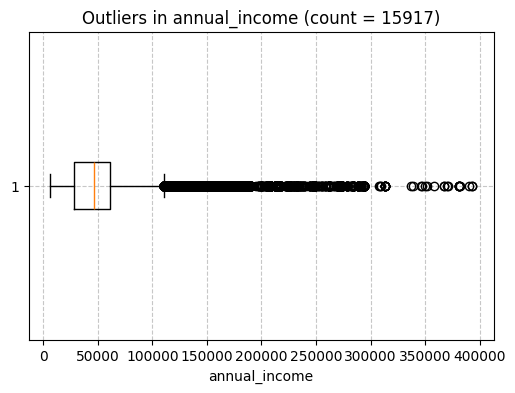

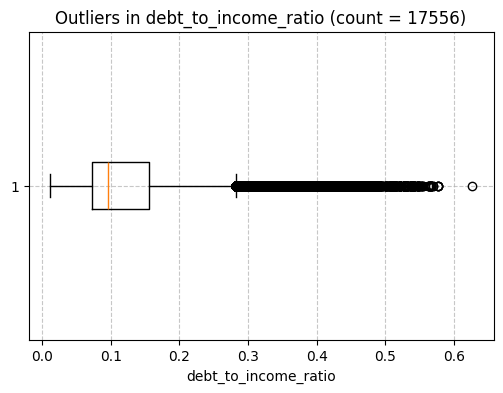

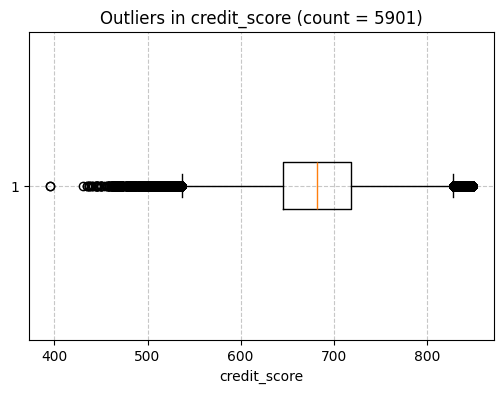

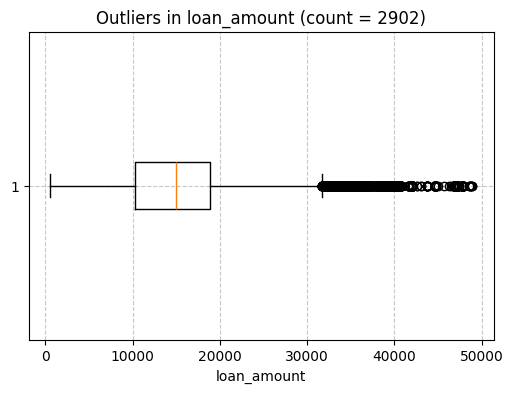

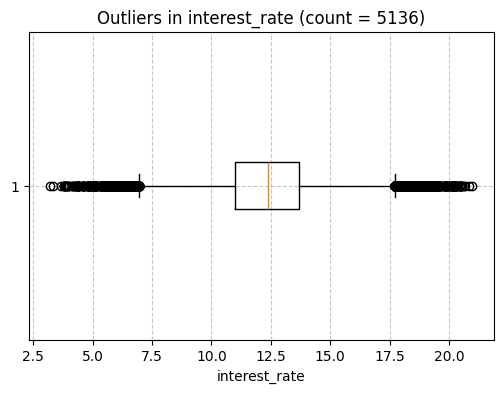


Outlier counts per column (excluding 'id' and 'loan_paid_back'):
annual_income: 15917
debt_to_income_ratio: 17556
credit_score: 5901
loan_amount: 2902
interest_rate: 5136

Total rows with at least one outlier: 45437


In [9]:
# Dictionary to store outlier counts
outlier_counts = {}

# DataFrame to track outlier rows (True = outlier)
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_df.columns)

temp_df = numeric_df.drop(columns=['id', 'loan_paid_back'])

# Loop through each numeric column
for col in temp_df.columns:
    Q1 = temp_df[col].quantile(0.25)
    Q3 = temp_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Boolean mask for outliers
    is_outlier = (temp_df[col] < lower_bound) | (temp_df[col] > upper_bound)
    outlier_counts[col] = is_outlier.sum()
    
    # Save mask
    outlier_mask[col] = is_outlier

    # Plot boxplot for each column
    plt.figure(figsize=(6, 4))
    plt.boxplot(temp_df[col], vert=False)
    plt.title(f'Outliers in {col} (count = {outlier_counts[col]})')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Count rows that have at least one outlier across remaining columns
common_outlier_rows = outlier_mask.any(axis=1).sum()

# Print summary
print("\nOutlier counts per column (excluding 'id' and 'loan_paid_back'):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

print(f"\nTotal rows with at least one outlier: {common_outlier_rows}")

In [10]:
# Remove outliers (assuming outlier_mask already computed)
rows_with_outliers = outlier_mask.any(axis=1)
df = df.loc[~rows_with_outliers].reset_index(drop=True)

# Separate numeric and categorical columns
numeric_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['category', 'object', 'string']).copy()

# Ensure 'loan_paid_back' is added as categorical (vectorized, no loop)
if 'loan_paid_back' in df.columns:
    df['loan_paid_back'] = df['loan_paid_back'].astype('category')
    # Combine existing categorical columns + loan_paid_back (unique union)
    categorical_df = df[df.columns.intersection(categorical_df.columns.tolist() + ['loan_paid_back'])]

print("✅ loan_paid_back added to categorical_df")
print(categorical_df.dtypes)


✅ loan_paid_back added to categorical_df
gender                 object
marital_status         object
education_level        object
employment_status      object
loan_purpose           object
grade_subgrade         object
loan_paid_back       category
dtype: object


# Checking for Imbalance Dataset in any aspect

## For Numerical Category

In [11]:
numeric_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,1.0
1,1,22108.02,0.166,636,4593.10,12.92,0.0
2,2,49566.20,0.097,694,17005.15,9.76,1.0
3,4,25496.70,0.053,665,12184.43,10.21,1.0
4,5,44940.30,0.058,653,12159.92,12.24,1.0


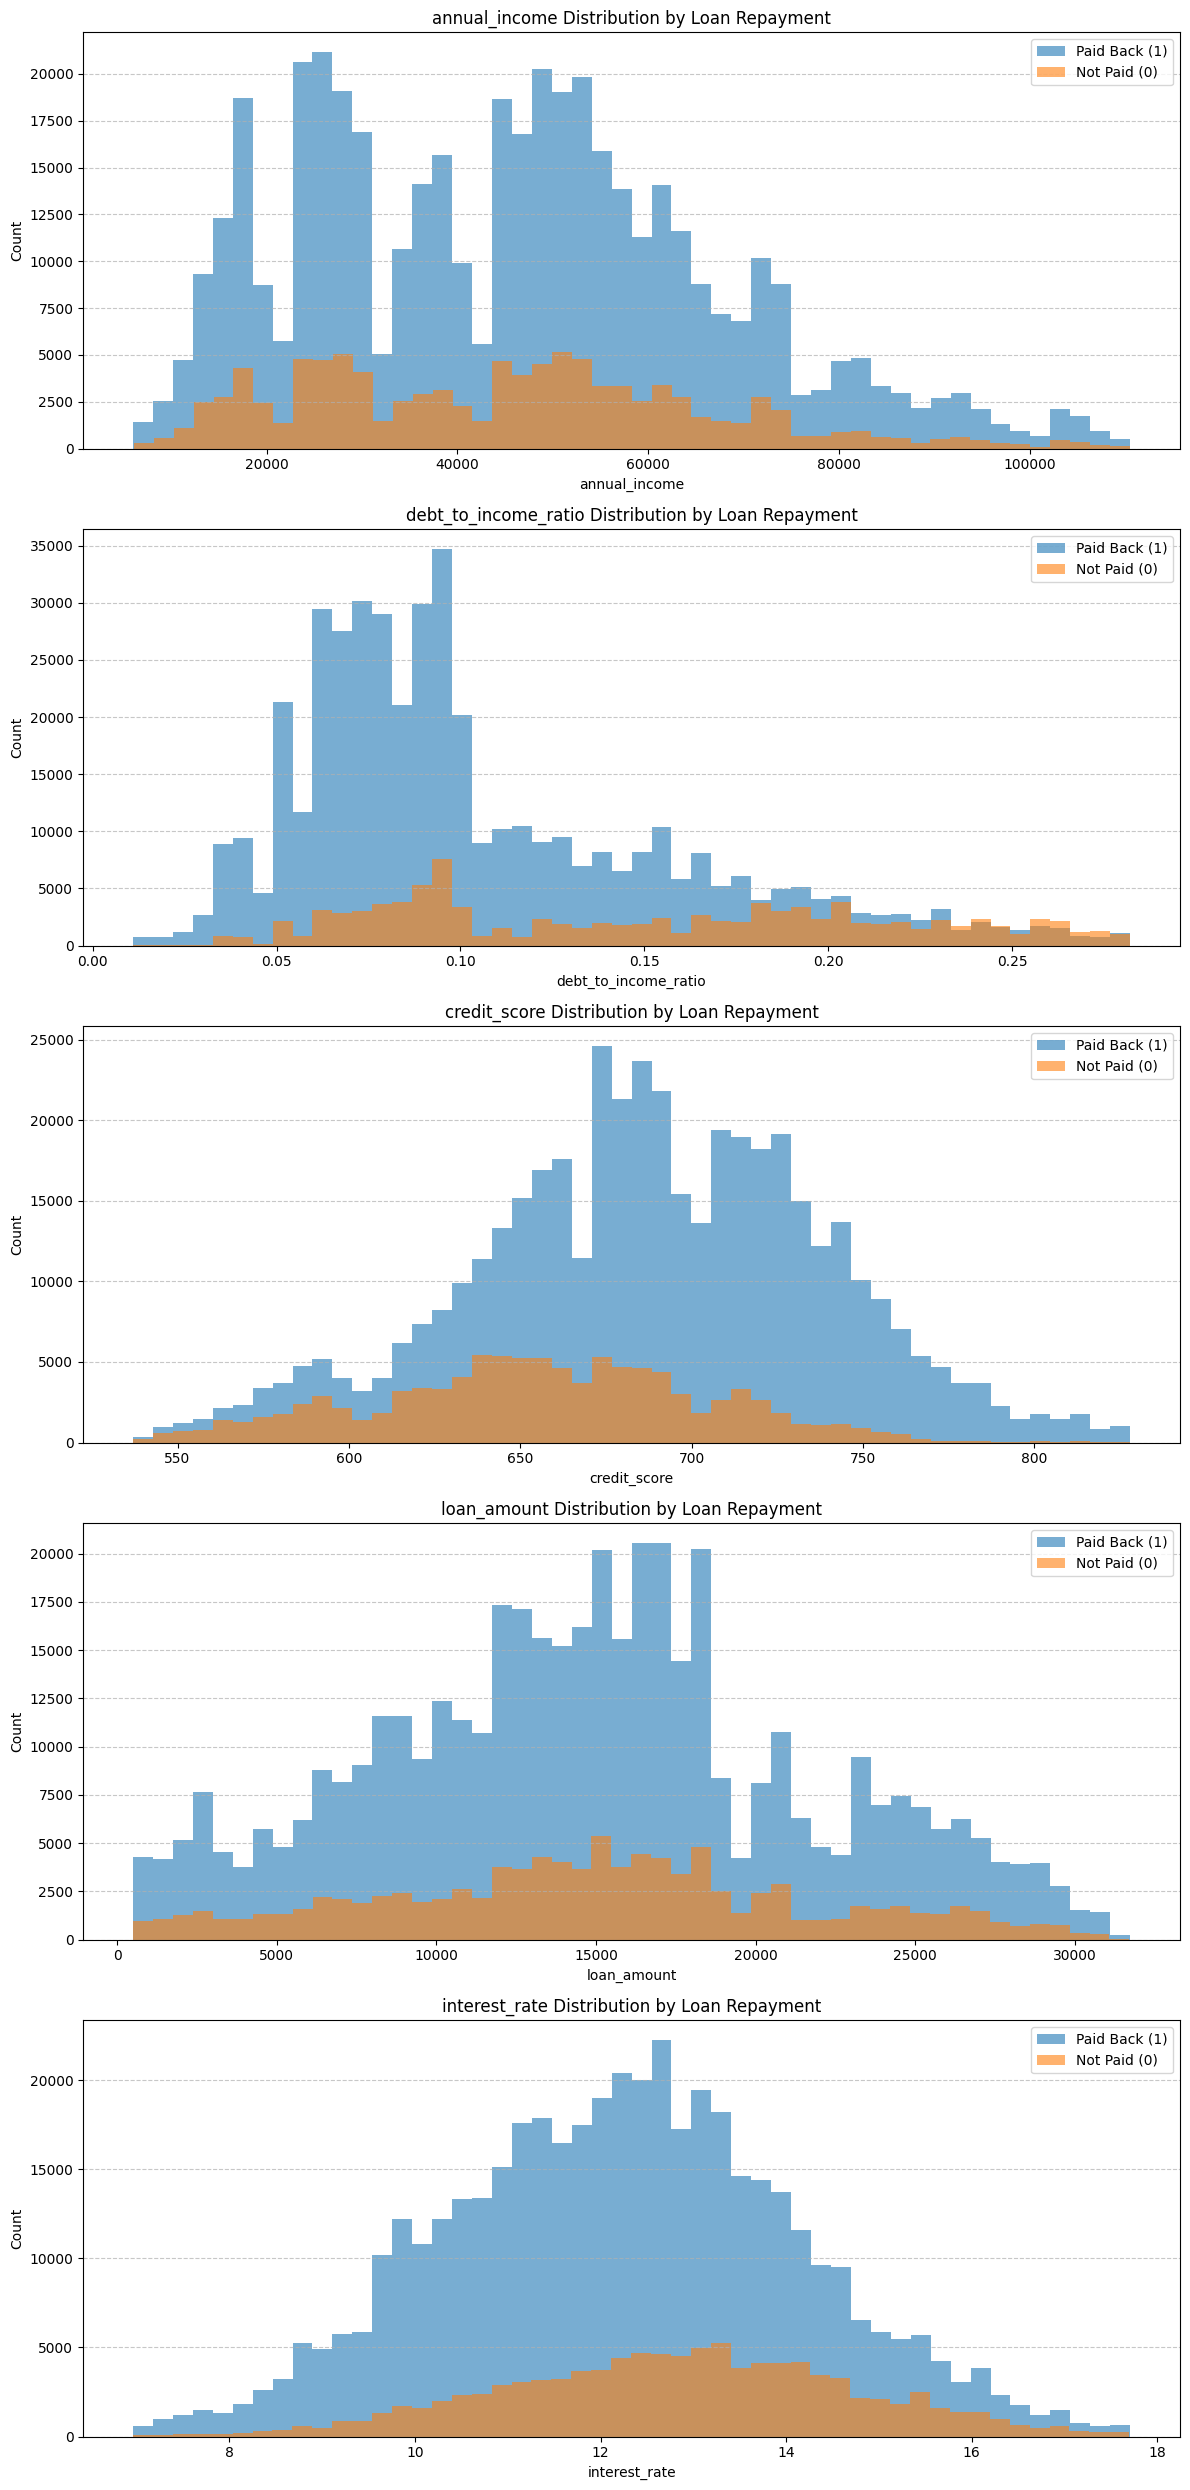

In [12]:
# List of numerical columns to plot (excluding id)
num_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

plt.figure(figsize=(12, 25))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)

    # Separate data based on loan repayment
    paid = df[df['loan_paid_back'] == 1][col]
    not_paid = df[df['loan_paid_back'] == 0][col]
    
    # Plot histograms side by side
    plt.hist(paid, bins=50, alpha=0.6, label='Paid Back (1)')
    plt.hist(not_paid, bins=50, alpha=0.6, label='Not Paid (0)')
    
    plt.title(f'{col} Distribution by Loan Repayment')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## For Categorical Category

In [13]:
categorical_df.head()

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,Female,Single,High School,Self-employed,Other,C3,1.0
1,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,Male,Married,High School,Employed,Other,D1,1.0
4,Male,Single,Bachelor's,Employed,Other,D1,1.0


/tmp/ipykernel_113459/3324862435.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, 'loan_paid_back']).size().unstack(fill_value=0)
/tmp/ipykernel_113459/3324862435.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, 'loan_paid_back']).size().unstack(fill_value=0)
/tmp/ipykernel_113459/3324862435.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupb

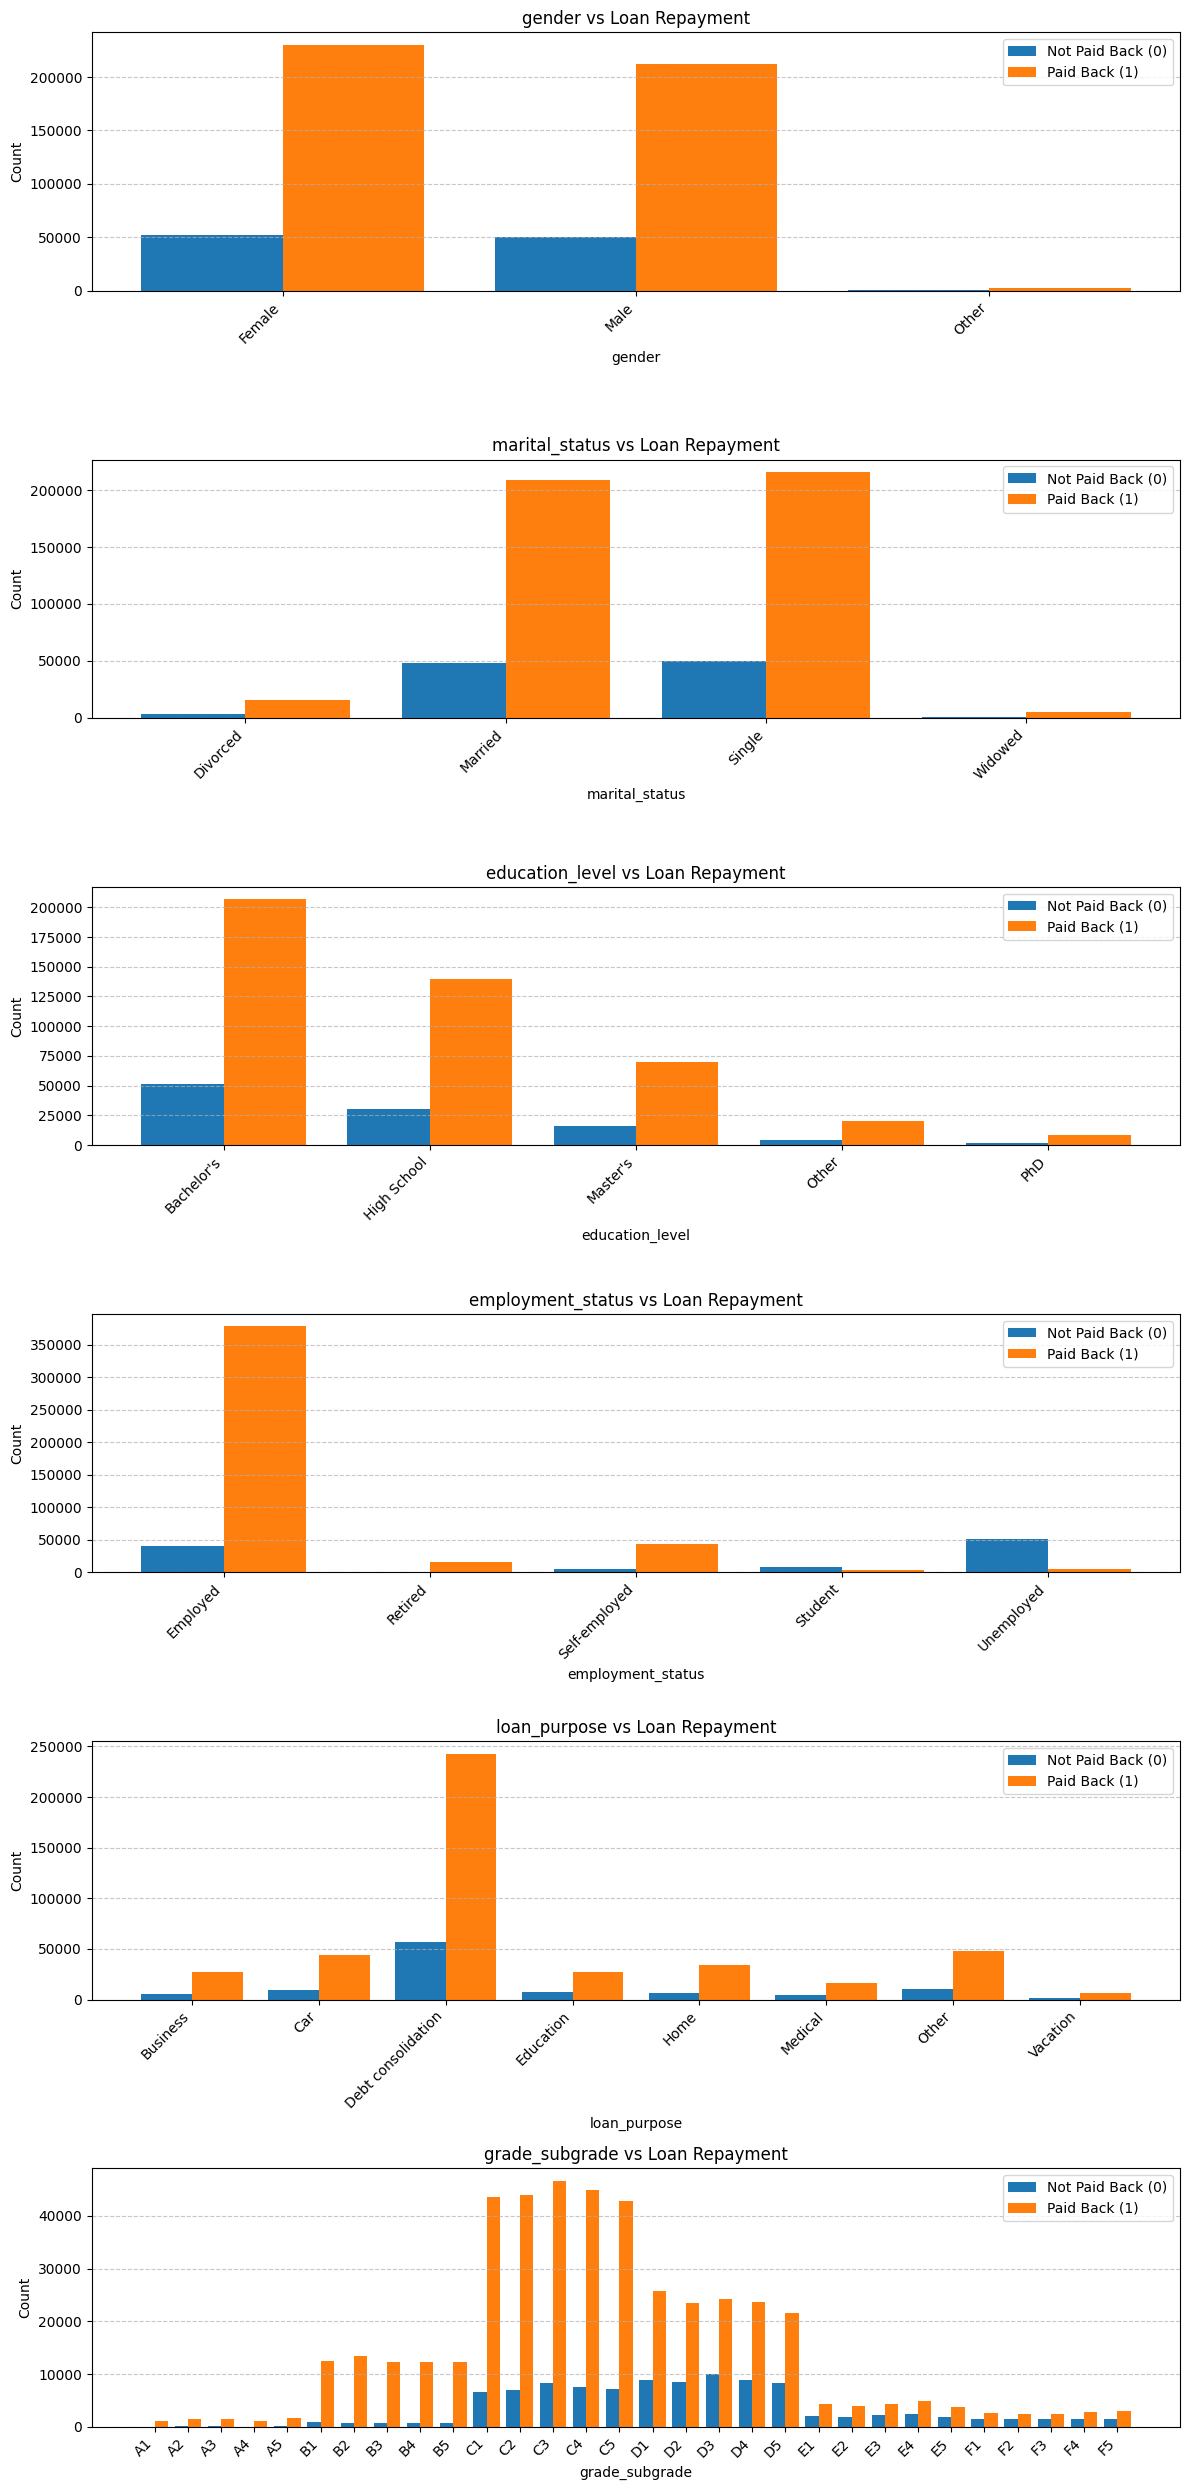

In [14]:
# List of categorical columns
categorical_cols = [
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade'
]

# Convert loan_paid_back to categorical if not already
df['loan_paid_back'] = df['loan_paid_back'].astype('category')

# Prepare subplots
plt.figure(figsize=(12, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)

    # Create grouped counts for each category split by loan_paid_back
    counts = df.groupby([col, 'loan_paid_back']).size().unstack(fill_value=0)

    # Bar positions and width
    x = np.arange(len(counts.index))
    width = 0.4

    # Bars for 0 (not paid back)
    plt.bar(x - width/2, counts[0], width, label='Not Paid Back (0)')
    # Bars for 1 (paid back)
    plt.bar(x + width/2, counts[1], width, label='Paid Back (1)')

    # Labels and title
    plt.title(f'{col} vs Loan Repayment')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(x, counts.index.astype(str), rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [15]:
threshold = 0.01  # 1%
for col in ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose']:
    freq = df[col].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    df = df[~df[col].isin(rare_categories)]

In [16]:
# Separate numeric and categorical columns
numeric_df = df.select_dtypes(include=['number'])
categorical_df = df.select_dtypes(include=['category', 'object', 'string']).copy()

# Ensure 'loan_paid_back' is added as categorical (vectorized, no loop)
if 'loan_paid_back' in df.columns:
    df['loan_paid_back'] = df['loan_paid_back'].astype('category')
    # Combine existing categorical columns + loan_paid_back (unique union)
    categorical_df = df[df.columns.intersection(categorical_df.columns.tolist() + ['loan_paid_back'])]

print("✅ loan_paid_back added to categorical_df")
print(categorical_df.dtypes)


✅ loan_paid_back added to categorical_df
gender                 object
marital_status         object
education_level        object
employment_status      object
loan_purpose           object
grade_subgrade         object
loan_paid_back       category
dtype: object


In [17]:
for col in categorical_df.columns:
    print(f"{col}: {categorical_df[col].nunique()} unique values")
    print(categorical_df[col].unique())
    print()

gender: 2 unique values
['Female' 'Male']

marital_status: 4 unique values
['Single' 'Married' 'Divorced' 'Widowed']

education_level: 5 unique values
['High School' "Master's" "Bachelor's" 'PhD' 'Other']

employment_status: 5 unique values
['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']

loan_purpose: 8 unique values
['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation' 'Car'
 'Medical' 'Business']

grade_subgrade: 30 unique values
['C3' 'D3' 'C5' 'D1' 'F1' 'D5' 'C2' 'C1' 'F5' 'D4' 'C4' 'D2' 'B1' 'B2'
 'A4' 'F4' 'E1' 'F2' 'B4' 'E4' 'B3' 'E3' 'B5' 'E5' 'E2' 'F3' 'A5' 'A3'
 'A1' 'A2']

loan_paid_back: 2 unique values
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]



/tmp/ipykernel_113459/3324862435.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, 'loan_paid_back']).size().unstack(fill_value=0)
/tmp/ipykernel_113459/3324862435.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, 'loan_paid_back']).size().unstack(fill_value=0)
/tmp/ipykernel_113459/3324862435.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupb

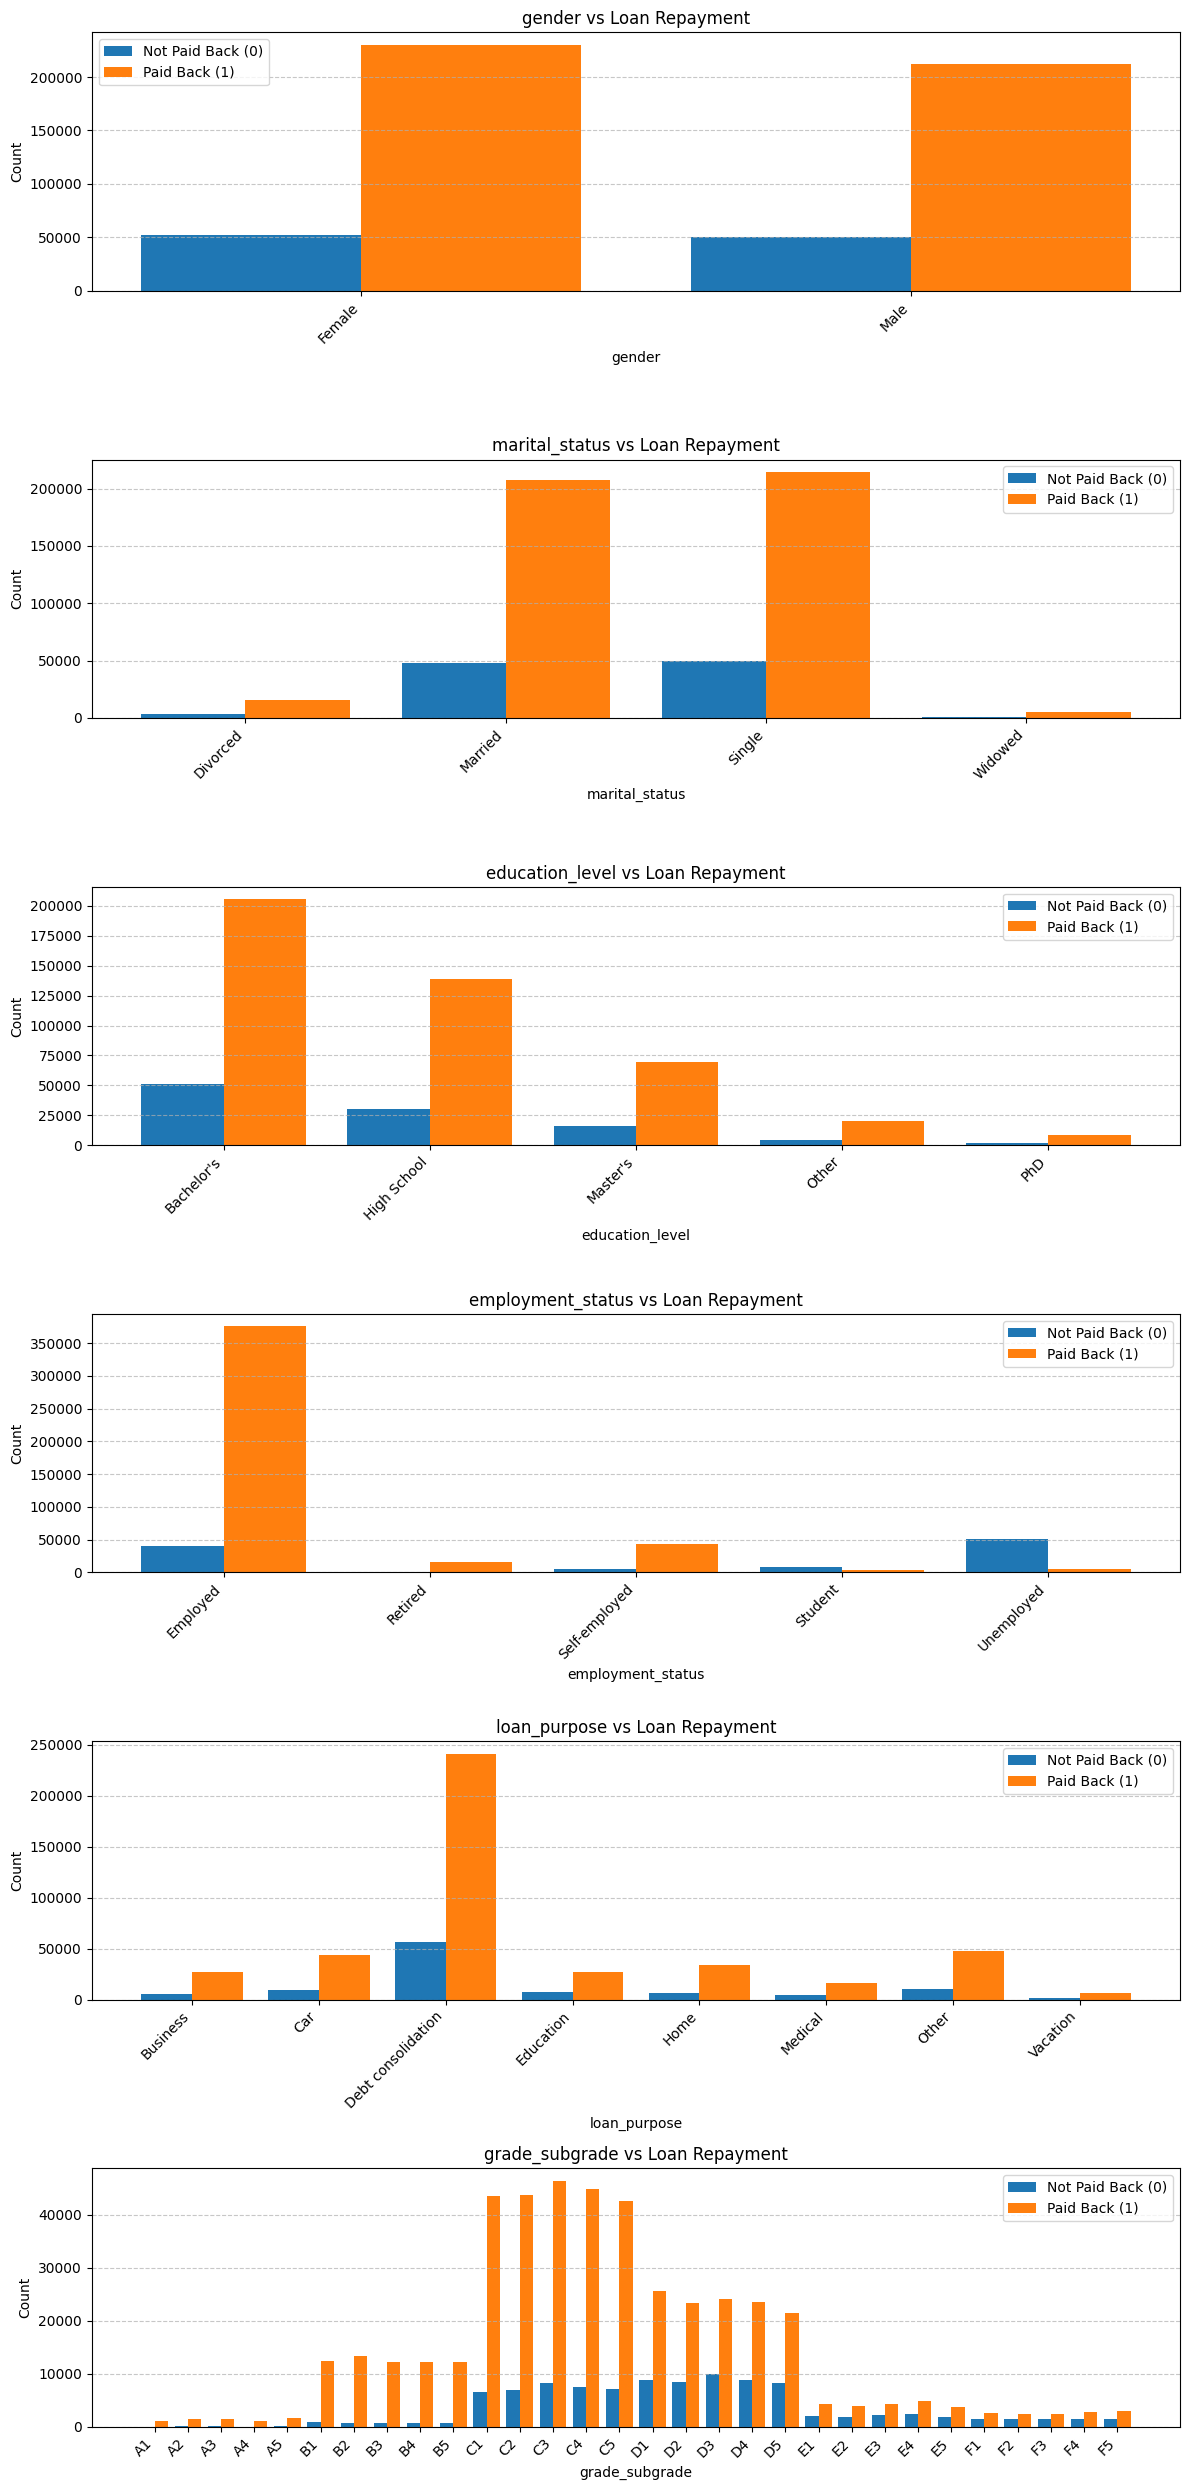

In [18]:
# List of categorical columns
categorical_cols = [
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade'
]

# Convert loan_paid_back to categorical if not already
df['loan_paid_back'] = df['loan_paid_back'].astype('category')

# Prepare subplots
plt.figure(figsize=(12, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)

    # Create grouped counts for each category split by loan_paid_back
    counts = df.groupby([col, 'loan_paid_back']).size().unstack(fill_value=0)

    # Bar positions and width
    x = np.arange(len(counts.index))
    width = 0.4

    # Bars for 0 (not paid back)
    plt.bar(x - width/2, counts[0], width, label='Not Paid Back (0)')
    # Bars for 1 (paid back)
    plt.bar(x + width/2, counts[1], width, label='Paid Back (1)')

    # Labels and title
    plt.title(f'{col} vs Loan Repayment')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(x, counts.index.astype(str), rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [19]:
df['loan_paid_back'].value_counts(normalize=True) * 100

loan_paid_back
1.0    81.16871
0.0    18.83129
Name: proportion, dtype: float64

# Encode Categorical Data as Numerical Data for our model

In [20]:
# Define categorical and numerical columns
categorical_cols = [
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade'
]

numerical_cols = [
    'annual_income',
    'debt_to_income_ratio',
    'credit_score',
    'loan_amount',
    'interest_rate'
]

# Create OneHotEncoder that ignores unseen categories
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Fit and transform the dataset (excluding target)
encoded_array = preprocessor.fit_transform(df)

# Get column names after encoding
encoded_col_names = (
    preprocessor.named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
)

# Combine into a final encoded DataFrame
encoded_df = pd.DataFrame(
    encoded_array,
    columns=list(encoded_col_names) + numerical_cols,
    index=df.index
)

# ✅ Add loan_paid_back back to the encoded DataFrame
encoded_df['loan_paid_back'] = df['loan_paid_back'].values

print(encoded_df.head())
print("\nShape of encoded data:", encoded_df.shape)

   gender_Female  gender_Male  marital_status_Divorced  \
0            1.0          0.0                      0.0   
1            0.0          1.0                      0.0   
2            0.0          1.0                      0.0   
3            0.0          1.0                      0.0   
4            0.0          1.0                      0.0   

   marital_status_Married  marital_status_Single  marital_status_Widowed  \
0                     0.0                    1.0                     0.0   
1                     1.0                    0.0                     0.0   
2                     0.0                    1.0                     0.0   
3                     1.0                    0.0                     0.0   
4                     0.0                    1.0                     0.0   

   education_level_Bachelor's  education_level_High School  \
0                         0.0                          1.0   
1                         0.0                          0.0   
2       

In [21]:
encoded_df.head()

,gender_Female,gender_Male,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,education_level_Bachelor's,education_level_High School,education_level_Master's,education_level_Other,...,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29367.99,0.084,736.0,2528.42,13.67,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,22108.02,0.166,636.0,4593.10,12.92,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49566.20,0.097,694.0,17005.15,9.76,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25496.70,0.053,665.0,12184.43,10.21,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44940.30,0.058,653.0,12159.92,12.24,1.0


In [22]:
encoded_df.shape

(545114, 60)

# Apply Normalization

In [23]:
# Split target before scaling
X = encoded_df.drop('loan_paid_back', axis=1)
y = encoded_df['loan_paid_back']

# Initialize and fit scaler only on feature columns
scaler = MinMaxScaler()
normalized_array = scaler.fit_transform(X)

# ✅ Create DataFrame with correct columns (only features)
normalized_df = pd.DataFrame(normalized_array, columns=X.columns, index=X.index)

# ✅ Add back the target column
normalized_df['loan_paid_back'] = y.values

print(normalized_df.shape)  # should now match encoded_df
print(normalized_df.head())

(545114, 60)
   gender_Female  gender_Male  marital_status_Divorced  \
0            1.0          0.0                      0.0   
1            0.0          1.0                      0.0   
2            0.0          1.0                      0.0   
3            0.0          1.0                      0.0   
4            0.0          1.0                      0.0   

   marital_status_Married  marital_status_Single  marital_status_Widowed  \
0                     0.0                    1.0                     0.0   
1                     1.0                    0.0                     0.0   
2                     0.0                    1.0                     0.0   
3                     1.0                    0.0                     0.0   
4                     0.0                    1.0                     0.0   

   education_level_Bachelor's  education_level_High School  \
0                         0.0                          1.0   
1                         0.0                          0.

In [24]:
normalized_df.info

<bound method DataFrame.info of         gender_Female  gender_Male  marital_status_Divorced  \
0                 1.0          0.0                      0.0   
1                 0.0          1.0                      0.0   
2                 0.0          1.0                      0.0   
3                 0.0          1.0                      0.0   
4                 0.0          1.0                      0.0   
...               ...          ...                      ...   
548552            1.0          0.0                      0.0   
548553            0.0          1.0                      0.0   
548554            1.0          0.0                      0.0   
548555            0.0          1.0                      0.0   
548556            0.0          1.0                      0.0   

        marital_status_Married  marital_status_Single  marital_status_Widowed  \
0                          0.0                    1.0                     0.0   
1                          1.0                   

# Train Test Evaluate Split

In [25]:
# Separate features (X) and target (y)
X = normalized_df.drop('loan_paid_back', axis=1)
y = normalized_df['loan_paid_back']

# Step 1: Train (80%) + Temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.2,           # 20% goes to val+test
    stratify=y,              # keep 81-19 ratio
    random_state=42
)

# Step 2: Split Temp into Validation (10%) and Test (10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,           # 50% of 20% = 10% of total
    stratify=y_temp,
    random_state=42
)

# Print shape summary
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

# Check balance in each split
print("\nClass balance check:")
print("Train:", y_train.value_counts(normalize=True).round(3))
print("Val:  ", y_val.value_counts(normalize=True).round(3))
print("Test: ", y_test.value_counts(normalize=True).round(3))

Train shape: (436091, 59), (436091,)
Validation shape: (54511, 59), (54511,)
Test shape: (54512, 59), (54512,)

Class balance check:
Train: loan_paid_back
1.0    0.812
0.0    0.188
Name: proportion, dtype: float64
Val:   loan_paid_back
1.0    0.812
0.0    0.188
Name: proportion, dtype: float64
Test:  loan_paid_back
1.0    0.812
0.0    0.188
Name: proportion, dtype: float64


# Model Creation

In [26]:
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=10, class_weight='balanced', random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200, learning_rate=0.1, random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=200, learning_rate=0.1, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.1, scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        eval_metric='auc', use_label_encoder=False, random_state=42
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300, learning_rate=0.1, class_weight='balanced', random_state=42
    )
}


In [27]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_proba = model.predict_proba(X_val)[:, 1]  # predicted probabilities for class=1
    auc = roc_auc_score(y_val, y_val_proba)
    results[name] = auc
    print(f"{name}: ROC-AUC = {auc:.4f}")


Random Forest: ROC-AUC = 0.9105
Gradient Boosting: ROC-AUC = 0.9182
AdaBoost: ROC-AUC = 0.9072


/home/gbk08/Predicting Loan Payback/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [05:49:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: ROC-AUC = 0.9212
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 353969, number of negative: 82122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1352
[LightGBM] [Info] Number of data points in the train set: 436091, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM: ROC-AUC = 0.9220


In [28]:
best_model_name = max(results, key=results.get)
best_auc = results[best_model_name]

print("\nBest Model:", best_model_name)
print("Best ROC-AUC Score:", best_auc)



Best Model: LightGBM
Best ROC-AUC Score: 0.9220085709972181


In [29]:
# Combine train + val
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

best_model = models[best_model_name]
best_model.fit(X_train_full, y_train_full)

y_test_proba = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"\n✅ Final Test ROC-AUC ({best_model_name}): {test_auc:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 398215, number of negative: 92387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1352
[LightGBM] [Info] Number of data points in the train set: 490602, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

✅ Final Test ROC-AUC (LightGBM): 0.9205


In [30]:
# Define your model with regularization and safe parameters
lgbm = lgb .LGBMClassifier(
    n_estimators=5000,
    learning_rate=0.01,
    num_leaves=31,
    min_data_in_leaf=300,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    reg_alpha=0.5,
    reg_lambda=0.5,
    random_state=42,
    class_weight='balanced'
)

# Store evaluation results
eval_result = {}

# ✅ Use callbacks for early stopping & logging
callbacks = [
    lgb.early_stopping(stopping_rounds=100, verbose=True),
    lgb.log_evaluation(period=100),
    lgb.record_evaluation(eval_result)
]

# Fit with evaluation sets
lgbm.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='auc',
    callbacks=callbacks
)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current va

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.01
,n_estimators,5000
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


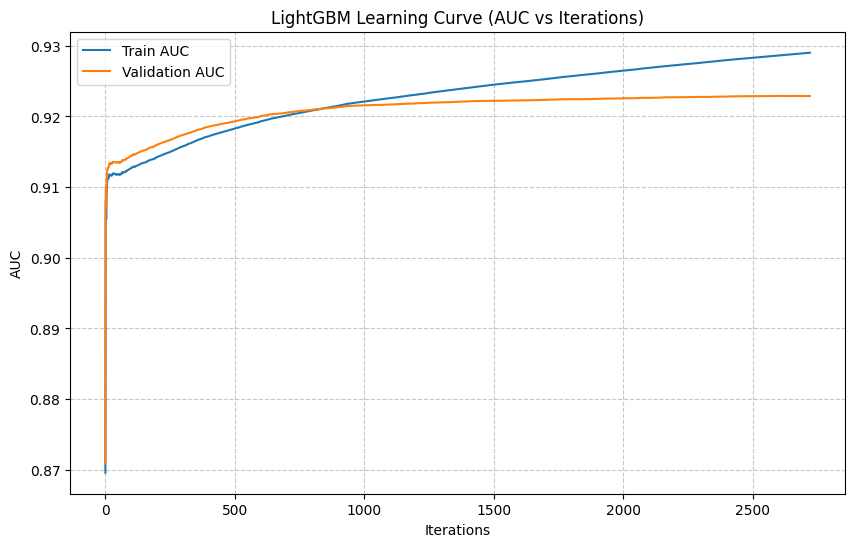

In [31]:
train_auc = eval_result['training']['auc']
valid_auc = eval_result['valid_1']['auc']  # 'valid_1' is your validation set key

plt.figure(figsize=(10, 6))
plt.plot(train_auc, label='Train AUC')
plt.plot(valid_auc, label='Validation AUC')
plt.xlabel('Iterations')
plt.ylabel('AUC')
plt.title('LightGBM Learning Curve (AUC vs Iterations)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Making the Submission File

In [32]:
test_df = pd.read_csv("KaggleDataset/test.csv")

In [33]:
# Apply the same OneHotEncoder + passthrough numerical transformation
test_encoded_array = preprocessor.transform(test_df)

# Get the encoded column names
encoded_col_names = (
    preprocessor.named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
)

# Recreate encoded test DataFrame
test_encoded_df = pd.DataFrame(
    test_encoded_array,
    columns=list(encoded_col_names) + numerical_cols,
    index=test_df.index
)


In [34]:
test_scaled_array = scaler.transform(test_encoded_df)
test_scaled_df = pd.DataFrame(
    test_scaled_array,
    columns=test_encoded_df.columns,
    index=test_encoded_df.index
)

In [35]:
# Predict probability or class (here we'll predict final class 0/1)
test_pred = lgbm.predict(test_scaled_df)

# Combine with 'id'
res = pd.DataFrame({
    'id': test_df['id'],
    'loan_paid_back': test_pred
})


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [36]:
res['loan_paid_back'] = res['loan_paid_back'].astype(int)

In [37]:
# Or save to CSV
res.to_csv("results.csv", index=False)